In [23]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [24]:
!pip install graphviz

In [43]:
# Load the required Libraries
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [26]:
test1 = np.array([1,0,1,0,1,0,1,0,1])
test2 = np.array([7.5,6,7,4,5,10,9.5,8.8,9])

In [27]:
x = np.array([test1,test2])
job = np.array([0,0,0,0,0,1,1,1,1])

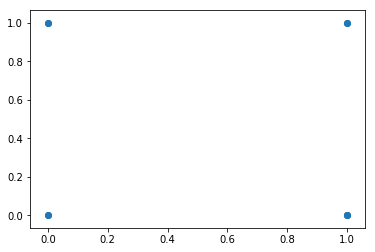

In [28]:
plt.scatter(test1,job)

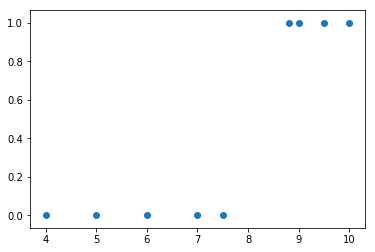

In [29]:
plt.scatter(test2,job)

In [30]:
dtc = DecisionTreeClassifier()

In [31]:
x

array([[ 1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ],
       [ 7.5,  6. ,  7. ,  4. ,  5. , 10. ,  9.5,  8.8,  9. ]])

In [32]:
x.T

array([[ 1. ,  7.5],
       [ 0. ,  6. ],
       [ 1. ,  7. ],
       [ 0. ,  4. ],
       [ 1. ,  5. ],
       [ 0. , 10. ],
       [ 1. ,  9.5],
       [ 0. ,  8.8],
       [ 1. ,  9. ]])

In [33]:
dtc.fit(X=x.T,y=job)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
dtc.predict(X=x.T)

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

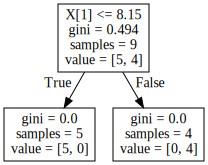

In [35]:
graphviz.Source(export_graphviz(dtc,out_file=None))

In [36]:
## Gini
1 - (((5/9)**2)+((4/9)**2))

0.49382716049382713

In [37]:
## Gini After
1 - (((5/9)*((5/5)**2)) + ((4/9)*((4/4)**2)))

0.0

In [112]:
bank1 = pd.read_csv("new_bank.csv")

In [113]:
bank1.head()

,age,marital,balance,loan,contact,y
0,30,married,1787,no,cellular,no
1,33,married,4789,yes,cellular,no
2,35,single,1350,no,cellular,no
3,30,married,1476,yes,unknown,no
4,59,married,0,no,unknown,no


In [114]:
bank2 = pd.get_dummies(bank1,columns=["marital","loan","contact","y"],drop_first=True)

In [115]:
bank2.head()

,age,balance,marital_married,marital_single,loan_yes,contact_telephone,contact_unknown,y_yes
0,30,1787,1,0,0,0,0,0
1,33,4789,1,0,1,0,0,0
2,35,1350,0,1,0,0,0,0
3,30,1476,1,0,1,0,1,0
4,59,0,1,0,0,0,1,0


In [116]:
trainx,testx,trainy,testy= train_test_split(bank2.iloc[:,:-1],bank2.iloc[:,-1],test_size=0.3,random_state=1)

In [117]:
dtc = DecisionTreeClassifier()

In [118]:
trainx.shape
trainy.shape
testx.shape
testy.shape

(1357,)

In [119]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
pred_train = dtc.predict(trainx)
pred_test = dtc.predict(testx)

In [121]:
pred_train
pred_test

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [122]:
print("Accuracy on train is:",accuracy_score(trainy,pred_train))

Accuracy on train is: 0.9949431099873578


In [123]:
print("Accuracy of test is:", accuracy_score(testy,pred_test))

Accuracy of test is: 0.7943994104642594


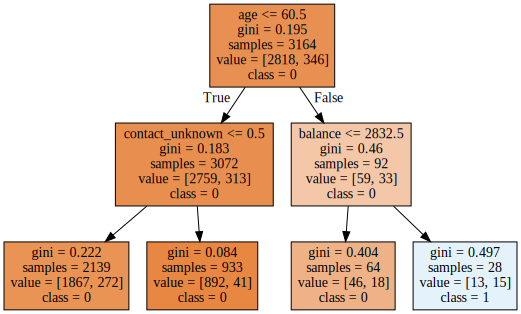

In [124]:
graphviz.Source(export_graphviz(dtc_2,feature_names=trainx.columns,filled=True,class_names=["0","1"],out_file=None))

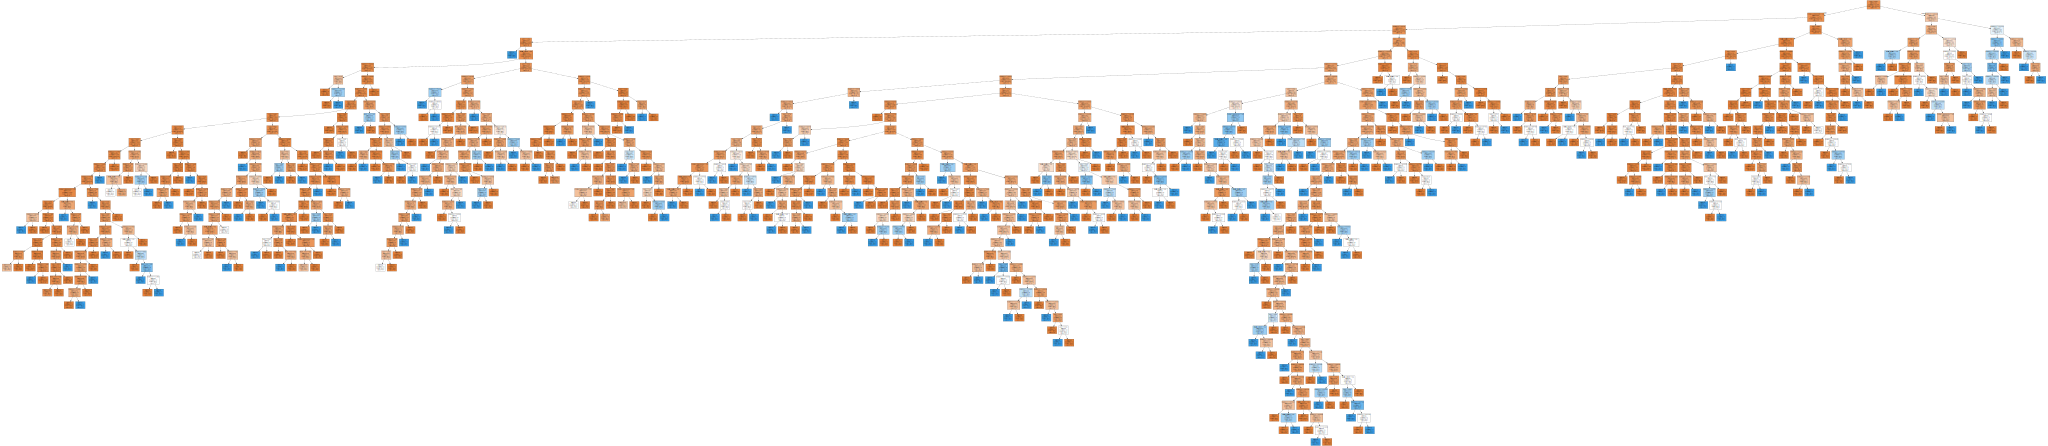

In [125]:
graphviz.Source(export_graphviz(dtc,feature_names=trainx.columns,filled=True,class_names=["0","1"],out_file=None))

In [ ]:
## DTC With Maxdepth

In [85]:
dtc_2 = DecisionTreeClassifier(max_depth=2)

In [86]:
dtc_2.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
pred_train_2 = dtc_2.predict(trainx)
pred_test_2 = dtc_2.predict(testx)

In [91]:
print("Accuracy of train is:",accuracy_score(trainy,pred_train_2))
print("Accuracy of test is :",accuracy_score(testy,pred_test_2))

Accuracy of train is: 0.8912768647281921
Accuracy of test is : 0.8703021370670597


In [ ]:
## DTR

In [149]:
customer1 = pd.read_csv("new_customer.csv")

In [150]:
customer1.head(2)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,NoOfGamesBought,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,10,Uniform,107.51
1,1,2,3,6,7,Uniform,382.40


In [151]:
customer2 = pd.get_dummies(customer1,columns=["City","FavoriteGame"],drop_first=True)

In [152]:
customer2.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteGame_Uniform
0,2,3,8,10,107.51,0,1
1,2,3,6,7,382.40,0,1
2,4,3,5,18,135.01,0,1
3,1,6,6,11,125.00,0,1
4,3,6,9,44,335.05,0,1


In [153]:
trainx,testx,trainy,testy = train_test_split(customer2.iloc[:,np.r_[0:4,5,6]],customer2.TotalRevenueGenerated,test_size=0.3,random_state=1)

In [154]:
trainx.shape
trainy.shape
testx.shape
testy.shape

(963,)

In [155]:
# DTR With No parameter Tuning

In [156]:
dtr = DecisionTreeRegressor()

In [157]:
dtr.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [158]:
pred_train = dtr.predict(trainx)

In [159]:
pred_test = dtr.predict(testx)

In [160]:
print("train error is:",mean_absolute_error(trainy,pred_train))

train error is: 16.372746405494176


In [161]:
print("test error is:", mean_absolute_error(testy,pred_test))

test error is: 53.75841268224679


In [162]:
# DTR with maxDepth

In [163]:
dtr_2 = DecisionTreeRegressor(max_depth = 2)

In [164]:
dtr_2.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
pred_train2 = dtr_2.predict(trainx)

In [166]:
pred_test2 = dtr_2.predict(testx)

In [167]:
print("Train error is:",mean_absolute_error(trainy,pred_train2))

Train error is: 44.56487220749387


In [168]:
print("test error is",mean_absolute_error(testy,pred_test2))

test error is 45.691194925288315
